In [84]:
from importlib import reload
import sys
import os
sys.path.append(os.path.abspath('../'))
import util
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [52]:
reload(util)
r0d0 = util.load_data(0,0)

# Kelp

In [53]:
kelp_raw = r0d0[r0d0['product'] == 'KELP'].set_index('timestamp')
kelp_raw.index = kelp_raw.index/1000

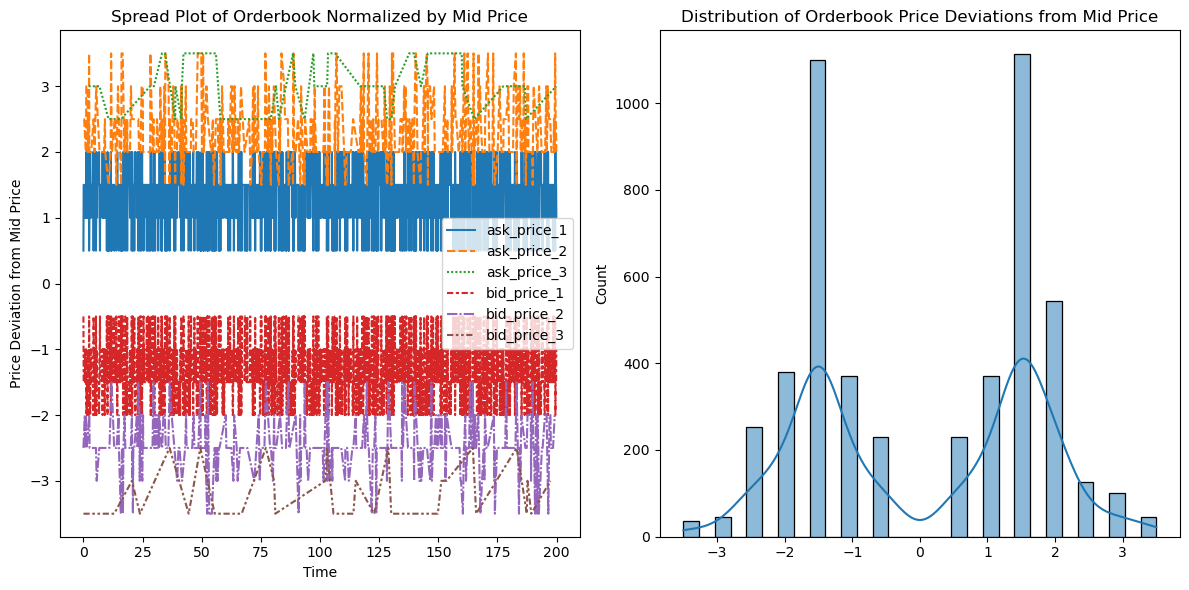

In [72]:
reload(util)
util.spread_plot(kelp_raw)

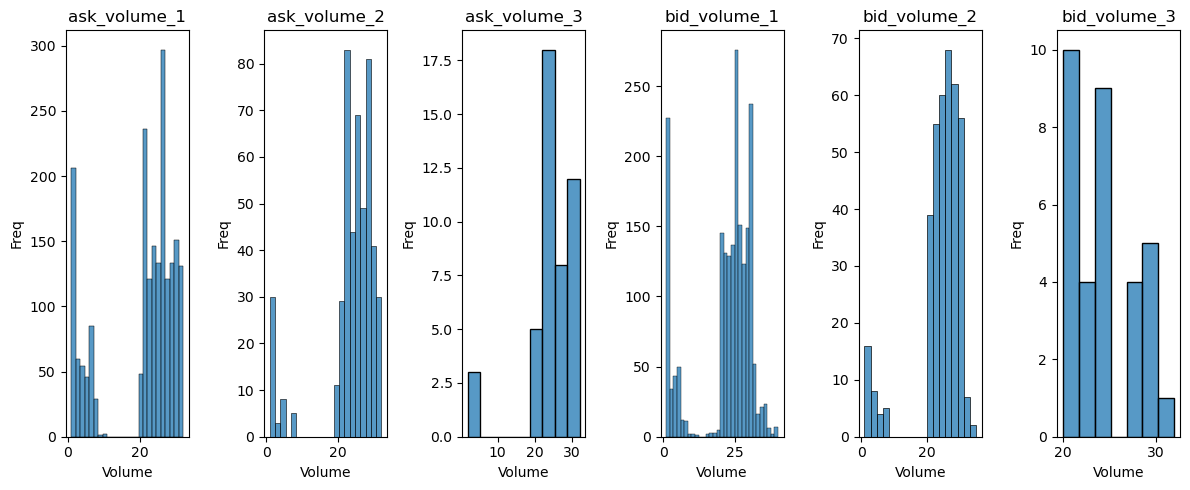

In [ ]:
reload(util)
util.volume_plot(kelp_raw)

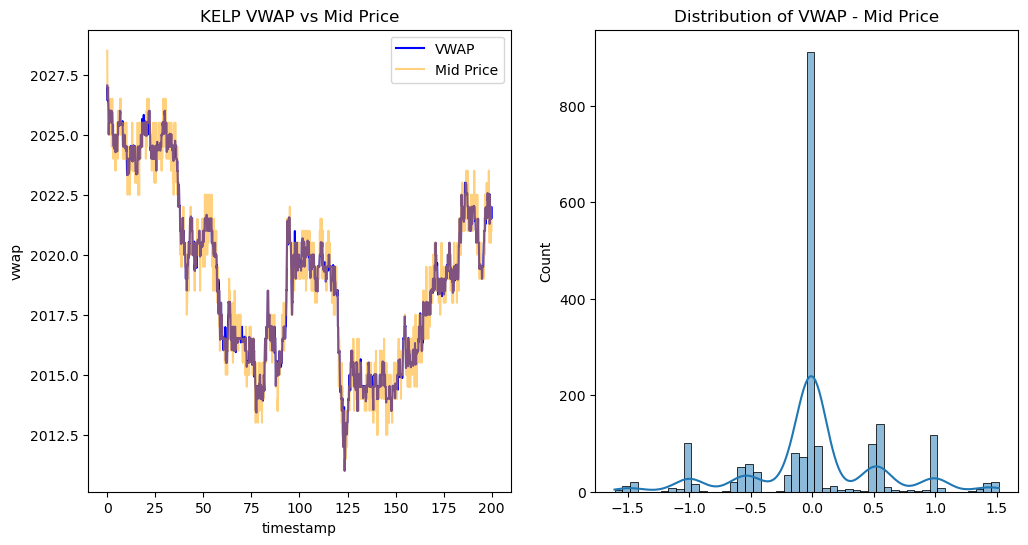

In [83]:
reload(util)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
kelp_raw['vwap'] = util.get_vwap(kelp_raw)
sns.lineplot(x=kelp_raw.index, y=kelp_raw['vwap'], ax = ax[0], label='VWAP', color='blue')
sns.lineplot(x=kelp_raw.index, y=kelp_raw['mid_price'], ax = ax[0], label='Mid Price', color='orange', alpha=0.5)
ax[0].set_title('KELP VWAP vs Mid Price')
sns.histplot(kelp_raw['vwap'] - kelp_raw['mid_price'], ax = ax[1], bins=50, kde=True)
ax[1].set_title('Distribution of VWAP - Mid Price')
plt.show()


In [87]:
kelp_ret = np.log(kelp_raw['vwap']).diff()

In [89]:
#ADF test for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(kelp_ret.dropna())
result

(-55.795093124637674,
 0.0,
 0,
 1998,
 {'1%': -3.433627137787501,
  '5%': -2.8629876622368218,
  '10%': -2.5675406736265796},
 -28823.62645933823)

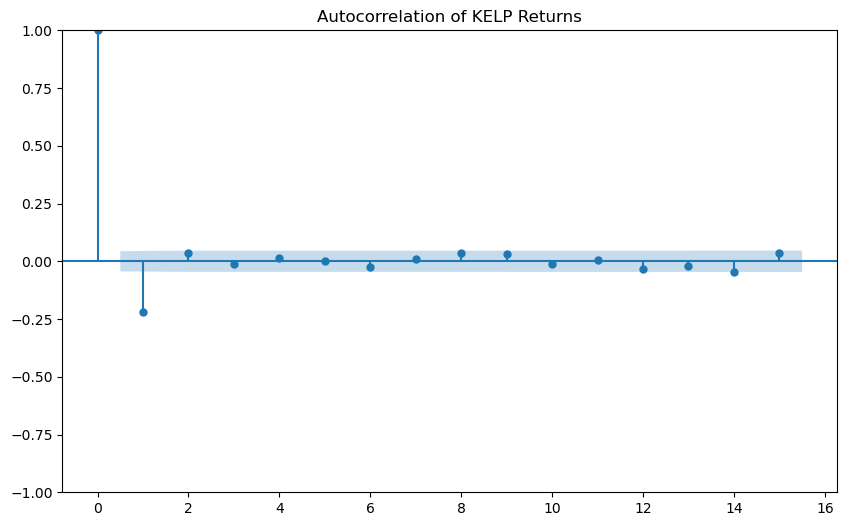

In [92]:
#autocorr plot
import statsmodels.api as sm

# Plot the autocorrelation of the returns
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_acf(kelp_ret.dropna(), lags=15, ax=ax)
plt.title('Autocorrelation of KELP Returns')
plt.show()

Can use last returns to preduct current returns? ADF test suggest to use r_{t-1} as a feature.

Also could mean short term reversion is a thing.